<img src="dsci512_header.png" width="600">

# Lecture 1 Time & space complexity, and big O notation

## High-level course introduction

Welcome to this algorithms and data structure course! The primary goal is to help you develop the mindset and skills of a computer scientist, specifically with a focus on algorithmic thinking. Throughout this course, you’ll learn how to approach problems in a structured way, breaking them down into steps that a computer can execute. This will involve thinking critically about how algorithms work, how efficient they are, and how they can be optimized. 

In addition, you’ll gain practical insights into what to do when your code runs too slowly. Understanding the performance of algorithms and knowing how to identify inefficiency in code will also be a key part of the course. 

It’s important to note that this course is highly compressed. While it touches on many of the fundamental topics found in traditional undergraduate algorithms and data structures courses, we won’t have time to delve deeply into every subject. Instead, we’ll focus on key ideas that will equip you with the essentials for algorithmic problem-solving.


## Learning objectives

By the end of this lecture, students will be able to:
- Given code, determine the time and space complexity using Big-O notation.
- Classify an algorithm into one of the common complexity classes (e.g. constant, logarithmic, linear, quadratic, etc.).
- Describe the linear and binary search algorithm.
- Explain why searching in a sorted list is faster than in an unsorted list.
- Contrast time and space complexity.
- Measure the amount of time code in Python takes using `timeit` or the `time` library.
- Maintain an awareness that choosing a good algorithm matters, sometimes _a lot_!

In [51]:
# import packages needed in this lecture
import numpy as np
import pandas as pd
from collections import defaultdict
import altair as alt
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

**Note:** this lecture is meant to be run in a Jupyter notebook. Part of the experience is that some cells take longer to run than others. Simply reading the notebook will not make sense.

## 1. Code demos: searching and sorting

#### Demo 1: searching (list vs. set)

- Common problem: is a certain value present in a collection of items?

In [2]:
n = 10_000_000
x = list(range(n))
x[:20]  # first 20 items

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [3]:
-1 in x

False

In [4]:
%timeit (-1 in x)

55.5 ms ± 1.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
x = set(range(n))

In [6]:
-1 in x

False

In [7]:
%timeit (-1 in x)

9.4 ns ± 0.0203 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)


Note that we were cheating a little bit, because _creating_ the set takes longer than creating the list.

```{note}
We use the `timeit` function to measure the runtime of a single statement. For more details, please refer to this [note](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html).
```

#### Demo 2: sorting (selection vs. quick)

Aside: min vs. argmin

In [8]:
x = [4.2, 98.2, 9.0, 0.1, 30, 2.5, 2.6]

In [9]:
min(x)  # Python min

0.1

In [10]:
np.min(x)  # Numpy min: generally better if working with Numpy arays

0.1

In [11]:
np.argmin(x)

3

In [12]:
x[3]

0.1

Above: `np.argmin` gives us the _index of_ the smallest value.

Now, back to the demo.

In [13]:
n = 20_000
x = list(range(n))

In [14]:
np.random.shuffle(x)

In [15]:
x[:10]

[16251, 3108, 11528, 7677, 17753, 18100, 4390, 11556, 14094, 19437]

In [16]:
print('sorting x...')
for i in range(n):
    min_ind = np.argmin(x[i:]) + i
    x[i], x[min_ind] = x[min_ind], x[i] # swap
print('done')

sorting x...
done


In [17]:
x[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [18]:
np.random.shuffle(x)

In [19]:
x[:10]

[13577, 2629, 6606, 12522, 898, 18853, 18433, 2538, 4435, 11524]

In [20]:
x.sort()

In [21]:
x[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

#### Demo 3: batch operations (loop vs. vectorized)

In [22]:
n = 50_000_000
x = np.random.rand(n)
y = np.zeros(n)

In [23]:
x.shape

(50000000,)

In [24]:
y.shape

(50000000,)

In [25]:
x[:10]

array([0.3395551 , 0.67566854, 0.47210526, 0.2550656 , 0.1592793 ,
       0.54044955, 0.44218232, 0.86662073, 0.84761432, 0.66299453])

In [26]:
y[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
print("running y=x*2")
for i in range(n):
    y[i] = x[i] * 2
print("done")

running y=x*2
done


In [28]:
x = np.random.rand(n)
y = np.zeros(n)

In [29]:
y = x * 2

Questions we'll answer in this course:

- How could I have predicted these outcomes?
- What if I double the size of $n$, how much slower will the code be in each case? (Quantitative analysis)
- Why did this happen? (not in detail)

## 2. Time complexity 

- We'll focus on the 2nd question about: how does the runtime change as a function of $n$?
- For now, let's ask ourselves: "if we double $n$, what happens to the number of steps?"

#### Examples from the above demos

For each of the following, what happens to the runtime if we double $n$?

**Operation:** Finding whether a number is in a list.
<br><br><br>

<br><br><br>
**Answer:** it doubles.

**Operation:** Finding whether a number is in a set.
<br><br><br>

<br><br><br>
**Answer:** it stays roughly the same.

**Operation:** Sorting with my code.
<br><br><br>

<br><br><br>
**Answer:** it quadruples (4x)

**Operation:** Sorting with `sort`.
<br><br><br>

<br><br><br>
**Answer:** it slightly more than doubles

**Operation:** Doubling an array with a loop.
<br><br><br>

<br><br><br>
**Answer:** it doubles

**Operation:** Doubling an array with numpy.
<br><br><br>

<br><br><br>
**Answer:** it doubles (but is much faster than with a loop!)

These scenarios form part of the roadmap of the course - by the end we'll hopefully have explored most of them.

## 3. Big O Notation


### 3.1. Definition

- We will formalize time complexity using _Big O notation_. 
  - In addition to $O$, there is also $o$, $\omega$, $\Omega$, $\theta$, $\Theta$, and more. But Big O is the most common and we'll only discuss Big O.
  - We will not go into the mathematical details but if you're interested, you can read about it online (e.g. the [Wikipedia article](https://en.wikipedia.org/wiki/Big_O_notation)).
- The Big O tells us the **approximate number of steps** an algorithm performs **as a function of the input size** (i.e. $n$ above)


#### Common runtimes

| Big O  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; |  name  | change in runtime if I double $n$? |
|-------|--------|-------|
| $O(1)$ | constant | same |
| $O(\log n)$ | logarithmic | increased by a constant |
| $O(n)$ | linear | 2x | 
| $O(n \log n)$ | linearithmic | roughly 2x | 
| $O(n^2)$ | quadratic | 4x |
| $O(n^3)$ | cubic | 8x |
| $O(n^k)$ | polynomial | increase by a factor of $2^k$ | 
| $O(2^n)$ | exponential | squared |

- We write $O(f(n))$ for some function $f(n)$.
- You get the doubling time by taking $f(2n)/f(n)$.
- E.g. if $f(n)=n^3$, then $f(2n)/f(n)=(2n)^3/n^3=8$. 
  - So if you double $n$, the running time goes up 8x.
- For $O(2^n)$, increasing $n$ by 1 causes the runtime to double!

Note: these are **common** cases of big O, but this list is not exhaustive.

#### Back to the examples from earlier 

For each of the following, what is the time complexity in Big O notation?

- Finding whether a number is in a list.

> Answer: $O(n)$

- Finding whether a number is in a set.

> Answer: $O(1)$ (more on this in Lecture 2)


- Sorting with my code.


> Answer: $O(n^2)$

- Sorting with `sort`.


> Answer: $O(n \log n)$ (more on this in Lecture 5)

- Doubling with a loop.


> Answer: $O(n)$

- Doubling with numpy.

> Answer: $O(n)$

#### Constant Factors & Lower-Order Terms

- In Big O notation, we ignore **multiplicative constants**.
  - If an algorithm takes $2n$ steps, we write $O(n)$, not $O(2n$).
  - We're interested in how the runtime grows, not the exact runtime.
- In Big O notation, we ignore **"lower order" terms**, including additive constants.
  - If the number of steps is $n+5$, we write $O(n)$ not $O(n+5)$
  - If the number of steps is $n+\log n$, we write $O(n)$ not $O(n+\log n)$
  - We're interested in the growth when $n$ is large.
  - The lower order terms stop being important when $n$ is large. 
  - But they might be important when $n$ is small!
- As such, Big O complexities can be misleading at times.
  - Is code that runs in $O(\log n)$ time faster than code that runs in $O(n)$ time?
  - Not always! It depends on the details.
  - $10000\log n$ is more than $0.001n$ for small values of $n$.

### 3.2. Visualizing Time Complexities

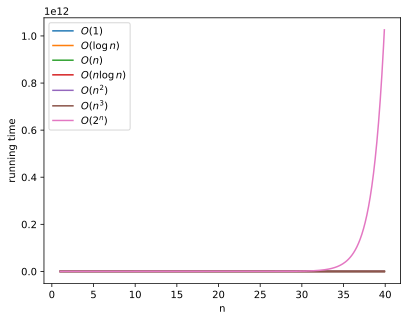

In [30]:
n = np.arange(1, 40, 0.1)

times = {
        r'$O(1)$': 0*n+1,
        r'$O(\log n)$': np.log(n),
        r'$O(n)$': n,
        r'$O(n \log n)$': n*np.log(n),
        r'$O(n^2)$': n**2.,
        r'$O(n^3)$': n**3.,
        r'$O(2^n)$':  2.**n
}

for name, t in times.items():
    plt.plot(n, t, label=name)
plt.legend()
plt.xlabel('n')
plt.ylabel('running time');

It is also common to look at log-log plots:

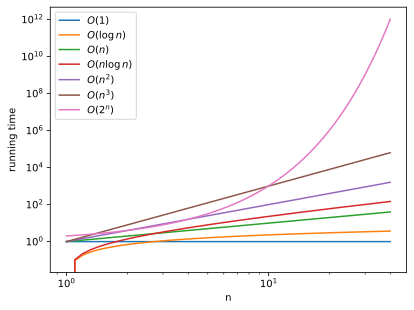

In [31]:
for name, t in times.items():
    plt.loglog(n, t, label=name)
plt.legend();
plt.xlabel('n');
plt.ylabel('running time');

- Above: we see that $2^n$ (exponential) is by far the biggest! 
- Let's remove $2^n$ so we can see the rest of the log-log plot more clearly:

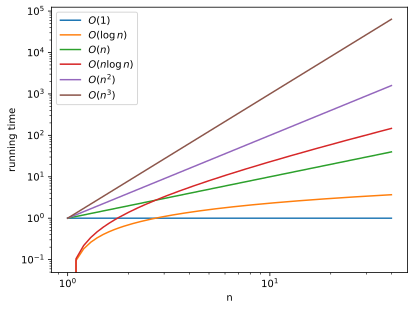

In [32]:
for name, t in times.items():
    if name != '$O(2^n)$':
        plt.loglog(n, t, label=name)
plt.legend();
plt.xlabel('n');
plt.ylabel('running time');

In log-log plots, polynomials turn into straight lines, with slope equal to the exponent.

### 3.3. Example Big O Analysis

Find the time complexities of `f` and `g` below.

In [33]:
def f(n):
    for i in range(n):
        for j in range(n):
            print(i, j)

<br><br><br><br>
$O(n^2)$
<br><br><br><br>

In [34]:
def g(n):
    for i in range(n):
        print(i)
    for j in range(n):
        print(j)

<br><br><br><br>
$O(n)$
<br><br><br><br>

#### How to determine the complexity?

- With raw Python code, we can often "count the number of loops"
  - A loop $n$ times gives $O(n)$
  - A nested loop gives $O(n^2$)
  - etc.
- However, we have to think about the functions we're using. 

##### Step 1: Determine the number of steps
```python
def g(n):
    for i in range(n):       # n iterations
        for i in range(n):   # n iterations
            print(j)         # constant-time (K)
    for j in range(n):       # n iterations
        print(j)             # constant-time (K)
```
So we have $f(n)=Kn^2+Kn$

##### Step 2: Remove constant factors and lower-order terms
$K$ is a constant factor, so we can remove it: $n^2+n$.

$n$ is lower order than $n^2$, so we can remove it: $n^2$.

Leaving us with: $O(f(n))=n^2$

#### What factors affect the runtime?

- What affects the Big O?
  - Typically, just the algorithm.
- What affects the constant?
  - The algorithm.
    - Does it take $n$ steps or $2n$ steps or $100000n$ steps?
    - How complicated is each step?
  - The _implementation_.
    - How fast is your programming language?
    - How fast are your libraries (e.g. Numpy)?
    - How fast is your laptop?
    - Is there an opportunity for parallel computation?
- The implementation issues are quite complicated. 
  - More on this later.

### 3.4. Lower Order Terms Revisited

Why is $O(n+\log(n)+5)$ considered the same as $O(n)$?


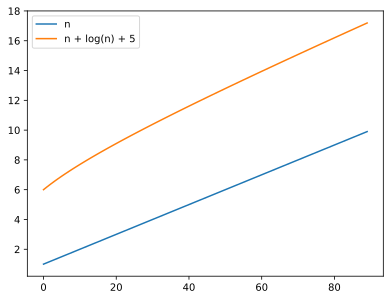

In [35]:
n = np.arange(1,10, 0.1)
plt.plot(n, label="n")
plt.plot(n+np.log(n)+5, label="n + log(n) + 5")
plt.legend();

- What you can see here is that $n+\log(n)+5$ starts curved but soon becomes linear-looking.
- We call the $\log(n)$ and the $5$ "lower order terms" because the grow more slowly than the dominant term ($n$).

#### For small n, the lower-order terms matter

- Consider an algorithm that takes $100\sqrt{n}$ steps vs. an algorithm that takes $n$ steps.
- According to big O, the second one is a faster-growing function, meaning the code will be slower.
- Let's plot it:

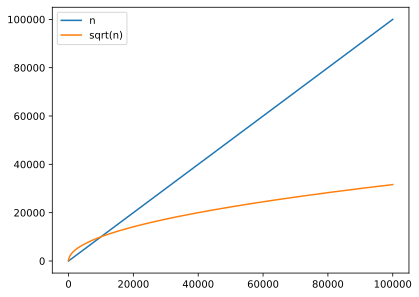

In [36]:
n = np.arange(1,100000)
plt.plot(n, label="n")
plt.plot(100*np.sqrt(n), label="sqrt(n)")
plt.legend();

- That seems to be true, $n$ grows faster than $\sqrt{n}$.
- But what if we zoom in:

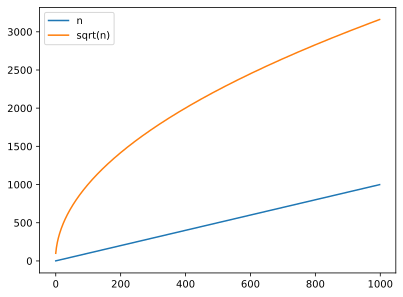

In [37]:
n = np.arange(1,1000)
plt.plot(n, label="n")
plt.plot(100*np.sqrt(n), label="sqrt(n)")
plt.legend();

- Actually, at first, the $100\sqrt{n}$ algorithm is slower! 
- So, we can't ignore the lower order terms all the time, we can just ignore them for large $n$.
- Big O analysis isn't the be-all and end-all. It's just often useful.

#### Addition vs. multiplication

- How is $n+\log(n)$ different from $n\log(n)$
- The first is $O(n)$, what about the second?

<br><br><br><br>
- The second is $O(n\log(n))$. 
- In Big O analysis, we keep the biggest **term**. 
  - Where "terms" are things being added together (not multiplied!)
- In the first case, the biggest term is $n$.
- In the second case, the biggest (and only) term is $n \log(n)$.

<br><br><br>

### 3.5. Big O with two variables

Consider this code:

In [38]:
def fun(n,m):
    for i in range(n):
        for j in range(m):
            print("Hello")
    
    for j in range(m):
            print("Hello")

What is the time complexity?

$nm+m$

- The time complexity here is $O(nm)$. 

- If $m=n$  then it would be $O(n^2)$. 
- Note that everything should be combined in one big O 
  - it should be $O(nm)$ and not $O(n)O(m)$. 
- Likewise with addition, one would write $O(n+m)$ and not $O(n)+O(m)$.
- $O(nm+m)$ would be just $O(nm)$
  - $nm+m=(n+1)m$ and we don't make a distinction between $n$ and $n+1$
- $O(n^2+n+m)$ would be just $O(n^2+m)$
- $O(n^2+nm + m)$ would be $O(n^2+nm)$. We can't throw away either term because we don't know which will end up being the "dominant" factor.

### 3.6. Worst/best/average cases

Consider this code:

In [39]:
def find_0(x):
    for x_i in x:
        if x_i == 0:
            return True
    return False

- If $n$ is the length of `x`, the runtime here is $O(n)$.

- But is it always? What if we know `x[0]` is always 0, for any $n$? Then it's $O(1)$.
- What if the $0$ could be anywhere? Then it's $n/2$ on average which is $O(n)$.
- Sometimes algorithms have different _best case_, _worst case_ and _average case_ runtimes.
- In this course we won't go into this distinction. We're generally referring to the worst case, which often is the same complexity as the average cases anyway when you're concerned with the asymptotic behaviour.

### 3.7. More examples: linear search and binary search

We return to the problem of checking whether an element is present in a collection.

#### Linear search

In [40]:
def search_unsorted(data, key):
    """
    Searches the key in data using linear search 
    and returns True if found and False otherwise. 

    Parameters
    ----------
    data : list
           the elements to search within
    key  : int
           the key to search for

    Returns
    -------
    bool
        boolean if key is contained in the data 

    Examples
    --------
    >>> search_unsorted([1, 7, 67, 35, 45], 3)
    False
    >>> search_unsorted([1, 7, 67, 35, 45], 7)
    True
    """

    for element in data:
        if element == key:
            return True
    return False

**Question:** What is the time complexity of the `search_unsorted`, as a function of the length of the list, $n$? 

<br><br><br><br><br><br><br><br> 
**Answer:** The time complexity of the `search_unsorted` function is $O(n)$ because in the worst case the function loops over $n$ elements. 

#### Binary search

- If the list is already sorted, we can search much faster with _binary search_.
- See the "binary search video" that was assigned as pre-class viewing. 
- We start in the middle and can just restrict ourselves to searching half the list after a comparison.
- Note: the input list must be sorted for the code to work.
- For more information, you can check out https://www.youtube.com/watch?v=y62zj9ozPOM&t=1314s (watch until 31:00.)

In [41]:
def search_sorted(data, key):
    """
    Searches the key in data using binary search 
    and returns True if found and False otherwise. 

    Parameters
    ----------
    data : list
           a list of sorted elements to search within
    key  : int
           the key to search for

    Returns
    -------
    bool :
        boolean if key is contained in the data 

    Examples
    --------
    >>> search_sorted([1, 7, 35, 45, 67], 3)
    False
    >>> search_sorted([1, 7, 35, 45, 67], 7)
    True
    """
    
    low = 0
    high = len(data) - 1
    while (low <= high):
        mid = (high + low)//2
        if data[mid] == key:
            return True
        if key < data[mid]:
            high = mid - 1
        else:
            low = mid + 1
    return False

**Question:** What is the time complexity of the `search_sorted`, as a function of the length of the list, $n$? 

<br><br><br><br><br><br><br><br> **Answer:** The time complexity of the `search_sorted` function is $O(\log n)$ because in the worst case, the function loops over $\log n$ elements, as the search space reduces by half in each iteration of the loop. 

**Question:** What happens if you call `search_unsorted` on sorted data? What happens if you call `search_sorted` on unsorted data?

<br><br><br><br><br><br> **Answer:** The `search_unsorted` function does not care about whether the data is sorted or not. In both cases, it sequentially searches for the key and returns `True` when it is found. The `search_sorted` function, on the other hand, is based on the assumption that the data is sorted in ascending order and you might miss the element you are looking for if called on unsorted data. In binary search, whenever we are in a position, all elements on the left are less than (or equal to in cases where values occur multiple times in the data) the element at the position and all elements on the right are greater than the element at the position, which is helpful in deciding which part of the list the next search should happen.   

For example:

In [42]:
search_sorted([3, 2, 1], 1)

False

**Question:** Why doesn't the `search_sorted` function start by verifying that the list is indeed sorted?

<br><br><br><br><br><br>
**Answer:** because this would take $O(n)$ time, defeating the purpose of the $O(\log\, n)$ lookup.

#### Code timing (pre-lab)

Below we empirically measure the running times of `search_unsorted` and `search_sorted`. 

**Question:** Why do I search for $-1$ in the code below? Why not $1$?

In [48]:

list_sizes = [100, 1000, 10000, 100000, 1_000_000, 10_000_000]

results = defaultdict(list)
results["size"] = list_sizes

key = -1

for list_size in list_sizes:
    print('List size: ', list_size)
    x = np.random.randint(1e8, size=list_size)

    time = %timeit -q -o -r 1 search_unsorted(x, key)
    results["Unsorted list linear"].append(time.average)
    # Note: -q prevents it from printing to the terminal
    #       -o sends the result to a variable (average time in seconds)
    #       -r 3 makes it average only 3 trials instead of the default of 7, which saves time

    time = %timeit -q -o -r 1 (key in x)
    results["Unsorted list in"].append(time.average)

    x.sort()
    time = %timeit -q -o -r 1 search_sorted(x, key)
    results["Sorted list binary"].append(time.average)

    x_set = set(x)
    time = %timeit -q -o -r 1 (key in x_set)
    results["Python set in"].append(time.average)

List size:  100
List size:  1000
List size:  10000
List size:  100000
List size:  1000000
List size:  10000000


**Answer**: we search for -1 because we know it will not be in the array. This gives us a worst case timing, because searching is the slowest  if it has to keep looking; it can be faster if it finds something right away. For example, if it's the 1st element, then linear search would seem extremely fast.

In [49]:
df = pd.DataFrame(results, columns=list(results.keys()))
df

,size,Unsorted list linear,Unsorted list in,Sorted list binary,Python set in
0,100,0.000003,0.000001,8.477828e-07,1.112635e-08
1,1000,0.000033,0.000001,1.263219e-06,1.115412e-08
2,10000,0.000314,0.000002,1.857211e-06,1.117821e-08
3,100000,0.003271,0.000011,2.255507e-06,1.086280e-08
4,1000000,0.033048,0.000090,2.742764e-06,1.008301e-08
5,10000000,0.323278,0.001316,3.225544e-06,1.326924e-08


Are these consistent with the time complexities we expected?

Reading runtimes from a table: what happens of $N$ becomes $10N$?

- Linear: time $T$ goes up to $10T$
- Logarithmic: time $T$ goes up to $T+\Delta T$
- Constant: time $T$ stays about the same

In [52]:
df_long = pd.melt(df, id_vars="size", var_name="method", value_name="time (s)")

alt.Chart(df_long).mark_line().encode(
    alt.X('size', scale=alt.Scale(type='log')),
    alt.Y('time (s)', scale=alt.Scale(type='log')),
    color='method'
).configure_axis(grid=False)

alt.Chart(...)

Note that the `binary_search` we wrote is actually slower than the linear search using `in` when the list is smaller than $10,000$ elements. Remember, big-O is just an "asymptotic" trend. There could be:

- Large/small constants, like $1000\log(n)$ vs. $n$.
- "Lower order terms", like $\log(n)+100 \log \log(n) + 100$ vs. $n$.

We are probably seeing the former; my code performs fewer steps (better complexity), but each step is much slower because the implementation is not optimized. (Often, though, we don't care too much about how code performs for very small inputs.)

(**Note:** the last ~10 minutes of material are not easy and very important. If you didn't completely follow, please review them later and ask questions as needed!)

The two fastest methods (the orange and blue curves) look quite similar. We can compare them on a log plot (time vs. $\log n$) to try and tell the difference.

In [53]:
df_long = pd.melt(df[["size", "Sorted list binary", "Python set in"]],
                  id_vars="size", var_name="method", value_name="time (s)")

alt.Chart(df_long).mark_line().encode(
    alt.X('size', scale=alt.Scale(type='log')),
    alt.Y('time (s)'),
    color='method'
).configure_axis(grid=False)


alt.Chart(...)

We can see that the set really is constant, but the binary search is logarithmic - in the plot, time is linear in $\log(n)$.

## 4. Space Complexity

- If code takes too long to run, that might be a problem.
- Another possible problem is running out of memory.
  - Note: this is NOT the same as "disk space".

In [54]:
import psutil
psutil.virtual_memory()

svmem(total=19327352832, available=7067254784, percent=63.4, used=9412755456, free=132120576, active=6940475392, inactive=6885933056, wired=2472280064)

- Apparently I have about 16 GB of RAM.

- A number typically takes up 8 bytes, so I can store around 2 billion numbers.
  - Actually less, because I have other stuff going on, not just Python.
  - Plus, there's overhead from within Python.
- If my code needs to store 2 billion numbers _at the same time_, I can't run it on my laptop. 
- We also analyze space complexity using Big O notation.


- With _time complexity_, we tend to think more about the _algorithms_.
- With _space complexity_, we tend to think more about the _data structures_.



#### Example 1:

```python
x = np.zeros(n)
```
<br><br><br>

<br><br><br><br>
Space complexity: $O(n)$

#### Example 2:

```python
x = np.zeros((n,n))
```
<br><br><br>



<br><br><br>
Space complexity: $O(n^2)$

#### Example 3:

```python
x = np.zeros((n,n,5))
```
<br><br><br>



<br><br><br>
Space complexity: $O(n^2)$

#### Example 4:

```python
x = np.zeros((n,n,n))
```
<br><br><br>



<br><br><br>
Space complexity: $O(n^3)$

<br><br><br>
##### Some tools for evaluating np array size:

In [55]:
x = np.zeros((3,3,3))

In [56]:
x.shape

(3, 3, 3)

In [57]:
x.size

27

In [58]:
np.prod(x.shape)

27

#### Example 5:

```python
x = np.zeros(5)
```
<br><br><br>



<br><br><br>
Space complexity: $O(1)$

#### Example 6 (time permitting): 

You have $n$ users on your social network site, and you want to store a "level of friendship" between every pair of users.
<br><br><br>

<br><br><br>
Space complexity: $O(n^2)$



#### Example 7 (time permitting):

You have $n$ users on your social network site, and you want to store who is friends with who.

<br><br><br>



<br><br><br>
Space complexity: it depends! If each user only has a constant (independent of $n$) number of friends, then $O(n)$. But in the worst case it could be $O(n^2)$. 

More on this in week 3!

##### Subtlety about space complexity:

In [59]:
range(5)

range(0, 5)

In [60]:
list(range(5))

[0, 1, 2, 3, 4]

In [61]:
np.arange(5)

array([0, 1, 2, 3, 4])

## 5. (Optional) Memory Swapping

In [62]:
import psutil
psutil.virtual_memory()

svmem(total=19327352832, available=7033159680, percent=63.6, used=9440935936, free=84115456, active=6978076672, inactive=6896566272, wired=2462859264)

In [63]:
x = np.random.rand(1_000_000_000)

In [64]:
x.shape

(1000000000,)

In [65]:
psutil.virtual_memory()

svmem(total=19327352832, available=3236691968, percent=83.3, used=5726339072, free=51134464, active=3204169728, inactive=3098361856, wired=2522169344)

In [66]:
x.nbytes

8000000000

In [67]:
from sys import getsizeof

In [68]:
getsizeof(x)

8000000112

In [69]:
x = np.random.rand(3_000_000_000)

In [70]:
x.nbytes

24000000000

In [71]:
psutil.virtual_memory()

svmem(total=19327352832, available=2860318720, percent=85.2, used=6300483584, free=150863872, active=3600777216, inactive=2582331392, wired=2699706368)

In [72]:
x.shape

(3000000000,)

It seems that I'm able to create a 24 GB numpy array with only 16 GB of RAM on my machine. This is most likely due to the availability of [_swap_ memory](https://linuxhint.com/swap_memory_linux/), where data in the RAM are written to the hard drive to make room for extra data when the RAM is nearly full.